# K-means

## 作业一
对一个二维数据组进行分类

### 1.读入数据
第一组数据是一个简单的二维数据集，首先读入数据并显示出来。

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894
(300, 2)


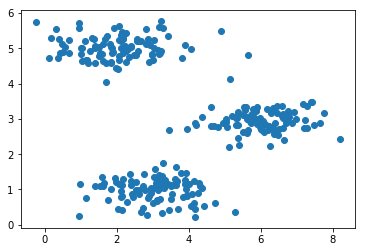

In [2]:
data = sio.loadmat('./data/ex7data2.mat')
# data = data['X']
data = pd.DataFrame(data.get('X'),columns=['X1','X2'])
print(data.head())
print(data.shape)
data = np.array(data.values)
plt.scatter(data[:,0],data[:,1])
plt.show()

### 2.定义Kmeans算法的两个循环
定义内循环的第一个循环：找到距离样本最近的聚类中心，并进行测试

In [3]:
def find_closest_centroids(X,centrodis):
    m = X.shape[0]
    k = centrodis.shape[0]
    index = np.zeros(m)
    
    for i in range(m):
        min_distance = 99999999
        min_index =-1
        for j in range(k):
            distance = np.sum((X[i,:]-centrodis[j,:])**2)
            if distance<min_distance:
                min_distance= distance
                index[i] = j
    return index

#测试
initial_centroids = np.array([[3,3],[6,2],[8,5]])
index = find_closest_centroids(data,initial_centroids)
print(index[:10])

[0. 2. 1. 0. 0. 0. 0. 0. 0. 0.]


定义内循环的第二个循环：计算样本的平均值，并改变聚类中心，进行测试

In [4]:
def change_centroids(X,index,k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        idxs = np.where(index == i)
        centroids[i,:] = np.mean(X[idxs,:],axis=1)
    return centroids

change_centroids(data,index,initial_centroids.shape[0])

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

### 3.运行Kmeans算法
对上述两个步骤进行迭代，运行kmeans算法，聚类中心的初始化采用随机的样本位置

In [5]:
def run_Kmeans(X,K,max_iters):
    m,n = X.shape
    idx = np.zeros(m)
    #初始化
    centroids = np.zeros((K,n))
    random_index = np.random.randint(0,m,K)
    centroids = X[random_index]
    
    centroids_dict = {'0':np.zeros((max_iters,centroids.shape[1])),
                      '1':np.zeros((max_iters,centroids.shape[1])),
                      '2':np.zeros((max_iters,centroids.shape[1]))}
    for i in range(max_iters):
        idx = find_closest_centroids(X,centroids)
        centroids = change_centroids(X,idx,K)
        centroids_dict['0'][i] = centroids[0]
        centroids_dict['1'][i] = centroids[1]
        centroids_dict['2'][i] = centroids[2]
    
    return centroids,centroids_dict,idx

将结果可视化

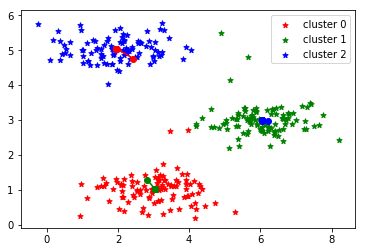

In [6]:
centroids,centroids_dict,idx = run_Kmeans(data,K=3,max_iters=10)

cluster0 = data[np.where(idx == 0)[0],:]
cluster1 = data[np.where(idx == 1)[0],:]
cluster2 = data[np.where(idx == 2)[0],:]

plt.scatter(cluster0[:,0],cluster0[:,1],s=30,color='r',marker='*',label='cluster 0')
plt.scatter(cluster1[:,0],cluster1[:,1],s=30,color='g',marker='*',label='cluster 1')
plt.scatter(cluster2[:,0],cluster2[:,1],s=30,color='b',marker='*',label='cluster 2')
plt.plot(centroids_dict['0'][:,0],centroids_dict['0'][:,1],"g-o")
plt.plot(centroids_dict['1'][:,0],centroids_dict['1'][:,1],"b-o")
plt.plot(centroids_dict['2'][:,0],centroids_dict['2'][:,1],"r-o")
plt.legend()
plt.show()

### 4.使用sklearn

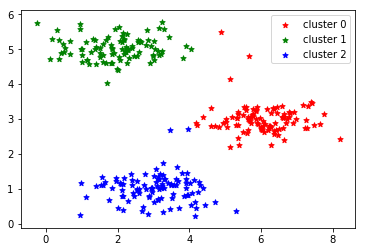

In [7]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(data)
idx = kmeans_model.predict(data)
centroids = kmeans_model.cluster_centers_

cluster0 = data[np.where(idx == 0)[0],:]
cluster1 = data[np.where(idx == 1)[0],:]
cluster2 = data[np.where(idx == 2)[0],:]

plt.scatter(cluster0[:,0],cluster0[:,1],s=30,color='r',marker='*',label='cluster 0')
plt.scatter(cluster1[:,0],cluster1[:,1],s=30,color='g',marker='*',label='cluster 1')
plt.scatter(cluster2[:,0],cluster2[:,1],s=30,color='b',marker='*',label='cluster 2')

plt.legend()
plt.show()

## 作业二
将Kmeans应用于图像压缩
### 1.读入数据

(16384, 3)


C:\Users\212726521\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\212726521\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


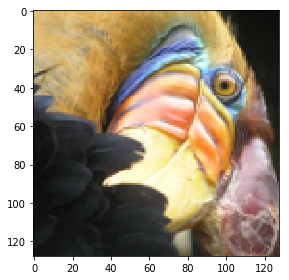

In [8]:
from skimage import io
img = io.imread('data/bird_small.png') /255
io.imshow(img)
data2 = np.reshape(img,(img.shape[0]*img.shape[1],img.shape[2]))
print(data2.shape)

### 2.进行聚类算法

(16384, 3)


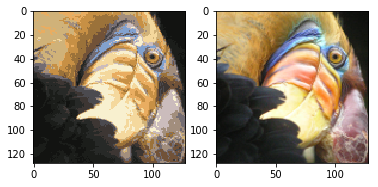

In [9]:
centroids,centroids_dict,idx = run_Kmeans(data2,K=16,max_iters=10)
data_recovered = centroids[idx.astype(int),:]
print(data_recovered.shape)
data_recovered = np.reshape(data_recovered,[img.shape[0],img.shape[1],img.shape[2]])
plt.subplot(1,2,1)
plt.imshow(data_recovered)
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

### 3.使用sklearn

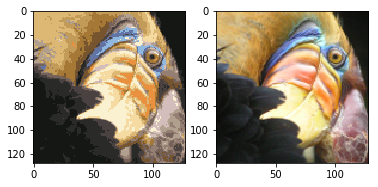

In [10]:

kmeans_model2 = KMeans(n_clusters = 16, n_init = 100, n_jobs=-1)
kmeans_model2.fit(data2)

centroids2 = kmeans_model2.cluster_centers_
index = kmeans_model2.predict(data2)

data_recovered = centroids2[index]
data_recovered = data_recovered.reshape((128,128,3))
plt.subplot(1,2,1)
plt.imshow(data_recovered)
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()